# Real Vs Fake Job Prediction Analysis

<img src="Images/Job_Search.webp" style="width:700px;height:600px">

## Project Goal
The objective of this project is to detect fraudulent job postings to improve user trust and reduce the impact of scams on job platforms and recruitment agencies.

## Overview
This project analyzes fraudulent and non-fraudulent job postings from a dataset set obtained from kaggle. This dataset contains job descriptions consisting of both real and fake job postings on an international level. The data consists of both textual information and meta-information about the jobs. This analysis aims to create classification models which can learn the job descriptions which are fraudulent based on its features such as title, location, description, and other attributes provided in the dataset. This will help the company's platform avoid scams and improve the integrity of job listings.

## 1.Business Understanding
Recruit Holdings' company aims to improve Glassdoor, a jobseeking platform, to maintain the integrity of their listings ensuring a positive user experience. However, fraudulent job postings are a growing concern not only misleading job seekers leading to financial loss and wasted effort, but also tarnishing the platform’s reputation. This results in a decrease in user engagement due to a decrease in trustworthiness, lower customer retention, and potential legal ramifications. Therefore, the company critically needs an automated solution to detect and remove fraudulent job postings before they can cause harm.

This analysis, therefore, aims in coming up with a reliable classification model that can predictively identify and filter out fraudulent job postings, thereby improving the trustworthiness of the platform and safeguarding users from potential scams to enhance user experience. This analysis will consider the following:

1.What is the distribution of fraudulent versus non-fraudulent job postings?

2.Which features show the strongest correlation with the target variable (fraudulent)?

3.How do binary features such as 'Has Company Logo' and 'Has Questions' correlate with fraudulent job postings?


## 2.Data Understanding
This dataset is obtained from kaggle and contains about 18K job descriptions consisting of both real and fake job postings. The dataset contains a mix of textual information and meta-information, which are crucial for understanding and predicting fraudulent job postings. 

The features in this dataset include title, location, department, salary_range, company_profile, description, requirements, benefits, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry and function. 
The target variable in this analysis is the fraudulent column that states the fraudulent and non-fraudulent jobs.

The analysis will aims to:

Evaluate the balance between real and fake job postings to understand the potential challenges of imbalanced classes incase which specialized techniques like SMOTE or class weighting may be necessary during model training.

Identify any missing values in the dataset, especially in key features like 'Description' or 'Company Profile'.

Analyze correlations between features and the target  variable to identify the most predictive features. 
Features such as 'Has Company Logo' and 'Has Questions' could be significant indicators of job authenticity.


## 3.Data Preparation

### Loading the dataset

In [1]:
#import the library
import pandas as pd
#Load the dataset
df=pd.read_csv('Data/fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [2]:
df.shape #Number of rows and columns

(17880, 18)

In [3]:
df.describe()# Get statistical summary of the data

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()#Get a summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

### Data Cleaning
From the above summary of the data, there are columns with missing values that are crucial for our analysis. 

In [5]:
df.isna().sum()#Checking for null values

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
df.isna().mean().sort_values(ascending= False)#Identifying of missing values for each column in relation to entire data

salary_range           0.839597
department             0.645805
required_education     0.453300
benefits               0.403244
required_experience    0.394295
function               0.361018
industry               0.274217
employment_type        0.194128
company_profile        0.185011
requirements           0.150727
location               0.019351
description            0.000056
title                  0.000000
fraudulent             0.000000
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
job_id                 0.000000
dtype: float64

#### Dropping rows
The 'description' column has only one missing hence best option is to drop that row.

In [7]:
df.dropna(subset=['description'], inplace=True)

#### Replacing the null values
For the rest of the data we replace the null values with the string 'Missing' as dropping or replacing the data may greatly affect the analysis.

In [8]:
df.fillna('Missing', inplace=True)

In [9]:
df.isna().sum() #Checking for any mssing values

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

### Distribution of Fraudulent Vs Non-Fraudulent job Postings

Based on the first question: What is the distribution of fraudulent versus non-fraudulent job postings?

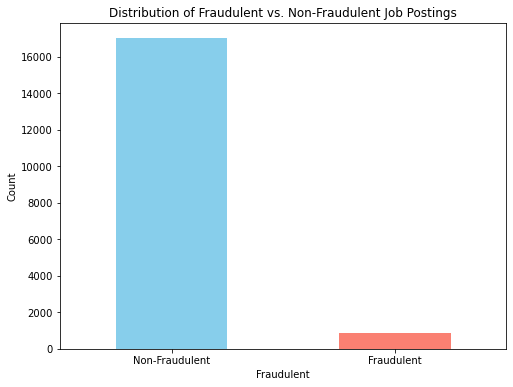

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot class distribution
plt.figure(figsize=(8, 6))
df['fraudulent'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Job Postings')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.show()

#### Observation
Based on the visualization above, the Non-fraudulent job postings are more as compared to the fraudulent ones.

### Correlation and Multicollinearity for Numeric Features
In this section, we check for correlation of the features and the target variable as well as check for multicollinearity between the features.

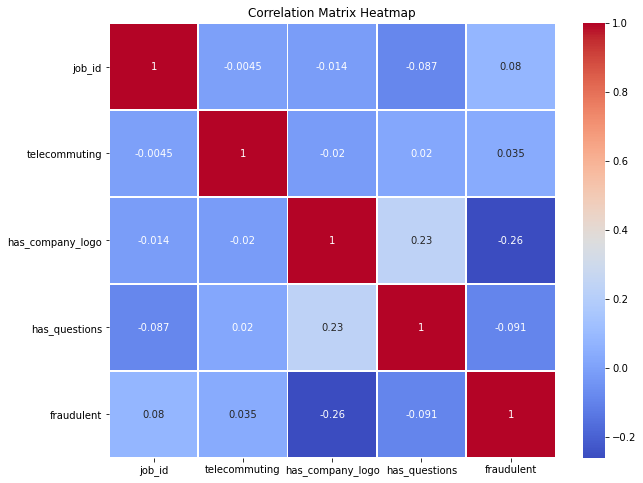

In [10]:
#import the libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (including the target)
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = df[numeric_features].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##### Interpretation
Based on the above, the correlations are all below 0.5, showing weak to almost no correlation between the features and the target variable.
The correlation between the features are quite weak hence no multicollinearity.

#### Feature Engineering
This transforms textual data into numerical features using TF-IDF and encodes categorical features to numeric.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Encode categorical features
categorical_features = ['location', 'department', 'salary_range', 'employment_type', 
                         'required_experience', 'required_education', 'industry', 'function']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Feature engineering: TF-IDF for text features
tfidf_description = TfidfVectorizer(max_features=500)
tfidf_description_matrix = tfidf_description.fit_transform(df['description'])
tfidf_description_df = pd.DataFrame(tfidf_description_matrix.toarray(), columns=tfidf_description.get_feature_names_out())

# Combine TF-IDF features with original data
df = pd.concat([df, tfidf_description_df], axis=1)
df.drop(['description'], axis=1, inplace=True)  # Drop original text column

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with the target variable 'fraudulent'
target_correlations = correlation_matrix['fraudulent'].sort_values(ascending=False)

# Set the number of top features to display
top_n = 20  # Adjust this number as needed

# Select the top N features with the highest absolute correlation with the target
top_features = target_correlations.abs().sort_values(ascending=False).head(top_n).index

# Filter the correlation matrix to include only these top features
filtered_corr_matrix = correlation_matrix.loc[top_features, top_features]

# Display the top N correlations
print("Top N features most correlated with the target:")
print(target_correlations.head(top_n))

In [ ]:
# Plot the heatmap for the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Top Correlated Features with Target')
plt.show()

# Alternatively, plot a bar plot of top N features' correlations with the target
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlations.head(top_n).index, y=target_correlations.head(top_n).values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Top N Feature Correlations with Target')
plt.ylabel('Correlation Coefficient')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA and fit to the data
pca = PCA(n_components=top_n)
pca_result = pca.fit_transform(df_encoded.drop(columns=['fraudulent']))

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(pca_result, columns=[f'PCA_{i+1}' for i in range(top_n)])

# Add the target variable back to the DataFrame
pca_df['fraudulent'] = df['fraudulent']

# Compute correlation of PCA components with the target
pca_corr_matrix = pca_df.corr()

# Plot the correlation heatmap of PCA components with the target
plt.figure(figsize=(10, 8))
sns.heatmap(pca_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('PCA Components Correlation with Target')
plt.show()

#### Defining X and y and Performing a Train_test_split

In this section, the features and target variable are defined then then data is split for a train_test_split. 

In [ ]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Define target and features
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 4.Modelling

For this analysis, we will use three types of models: Logistic Regression, Random Forest, and Gradient Boosting.
We’ll also perform hyperparameter tuning for Gradient Boosting.

### i) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the model
lr = LogisticRegression(random_state=42, class_weight='balanced')
lr.fit(X_train, y_train)

# Predict and evaluate
lr_pred = lr.predict(X_test)
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]):.4f}")

### ii)Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf.predict(X_test)
print("Random Forest Performance:")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.4f}")

### iv) Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialize and train the model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_gb = grid_search.best_estimator_

# Predict and evaluate
gb_pred = best_gb.predict(X_test)
print("Gradient Boosting Performance:")
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, best_gb.predict_proba(X_test)[:, 1]):.4f}")

## 5.Evaluation

## 6.Conclusion